In [1]:
import pandas as pd
import numpy as np
from plotnine import *

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
%%bash
rm -f arith.txt
find Benchs -name 'arith.txt' >> arith.txt

In [3]:
files = []
with open('arith.txt') as f:
    for line in f:
        files.append(line.strip())

In [4]:
# insts = ['Add', 'Sub', 'Xor', 'Shl', 'LShr', 'AShr', 'Mul', 'UDiv', 'SDiv', 'And', 'Or']
insts = ['Add', 'Sub', 'Xor', 'Mul', 'FAdd', 'FSub', 'FMul']
header = insts + [ x + '_total' for x in insts]

In [7]:
df = pd.DataFrame(columns=['Benchmark', 'Group'] + header)
for f in files:
    df2 = pd.read_csv(f, header=None).transpose()
    df2.columns = df2.iloc[0]
    df2 = df2[1:]
    d = dict()
    for h in insts:
        try:
            d[h] = float(df2.iloc[0][h])/float(df2.iloc[1][h])
        except:
            d[h] = 0.0
        d[h + '_total'] = df2.iloc[1][h]
    d['Benchmark'] = f.split('/')[1] if len(f.split('/')) == 3 else f.split('/')[2]
    d['file'] = '/'.join(f.split('/')[1:-1])
    d['Group'] = f.split('/')[1]
    df = df.append(d, ignore_index=True)

df = df.round(3)


for h in insts:
    df[h + '_total'] = df[h + '_total'].astype(np.int64)

In [8]:
df.head()

,Benchmark,Group,Add,Sub,Xor,Mul,FAdd,FSub,FMul,Add_total,Sub_total,Xor_total,Mul_total,FAdd_total,FSub_total,FMul_total,file
0,mandel-2,Misc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,Misc/mandel-2
1,dt,Misc,0.001,0.000,0.000,0.000,0.000,0.000,0.000,134219776,2048,0,0,2048,0,4096,Misc/dt
2,flops-5,Misc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,156249999,0,0,0,2031250001,0,2343750002,Misc/flops-5
3,flops-2,Misc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,390625001,234375004,156250003,Misc/flops-2
4,oourafft,Misc,0.007,0.000,0.000,0.000,0.115,0.125,0.000,3175539676,36000515,0,904105,4006838660,4524643966,4089638976,Misc/oourafft


In [9]:
# df.to_clipboard(float_format='%.3f')

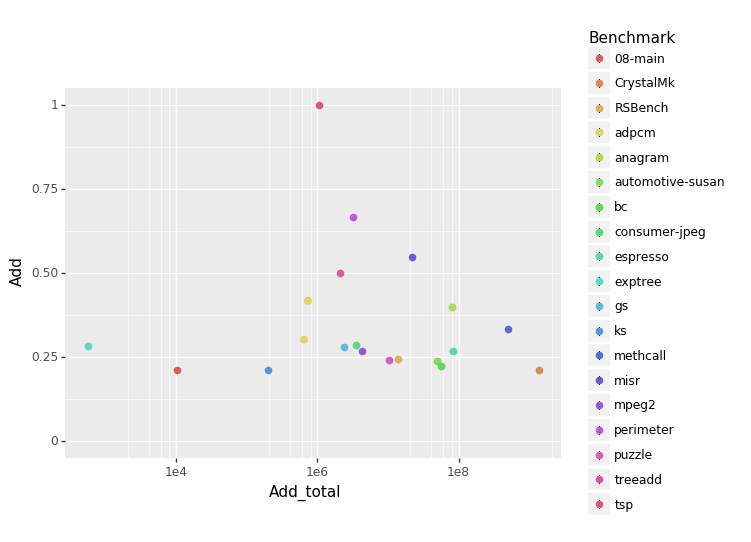

<ggplot: (-9223372036569795552)>

In [10]:
(ggplot(df[(df.Add > 0.2) & (df.Add_total > 100)])
 + scale_x_log10()
 + geom_point(aes(x='Add_total', y='Add', fill='Benchmark'), stroke=0.02, size=3)
 + ylim((0, 1.0))
)

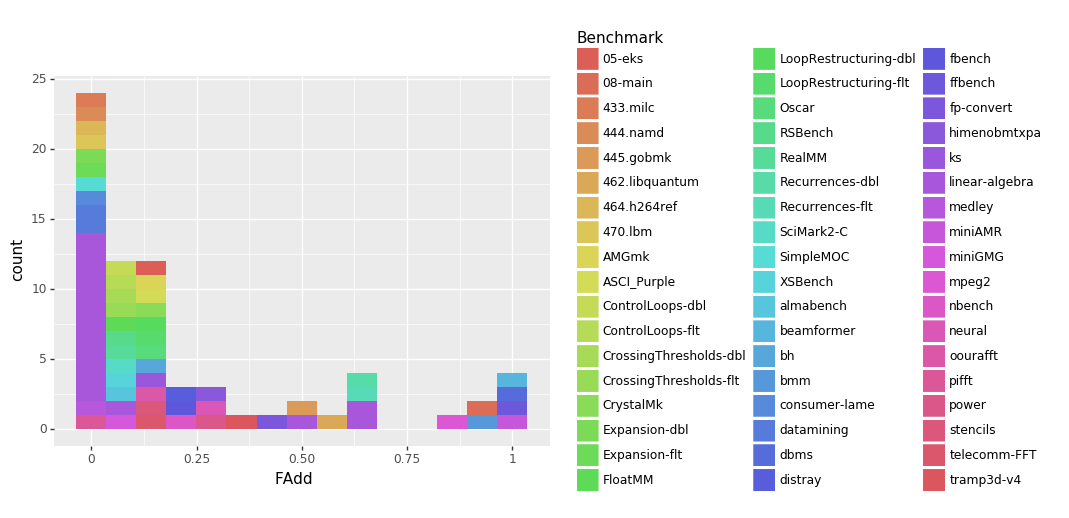

<ggplot: (-9223372036569236171)>

In [16]:
(ggplot(df[(df.FAdd > 0.0) & (df.FAdd_total > 100000)], aes(x='FAdd'))
 + geom_histogram(aes(fill='Benchmark'), bins=15)
)

In [49]:
def get_column(df, cn, th=0.3, min_abs=100000):
    return df.query('({cn} > {th}) & ({cn}_total > {min_abs})'.format(cn=cn, th=th, min_abs=min_abs)) \
            .sort_values(by=cn)[['Group', 'Benchmark', 'file', cn, cn + '_total']]

### FAdd

In [52]:
get_column(df, 'FAdd', th=0.8)

,Group,Benchmark,file,FAdd,FAdd_total
197,mediabench,mpeg2,mediabench/mpeg2/mpeg2dec,0.882,7167744
205,McCat,08-main,McCat/08-main,0.945,16338942
250,VersaBench,bmm,VersaBench/bmm,0.961,1073741824
247,VersaBench,beamformer,VersaBench/beamformer,0.985,1288194048
132,DOE_ProxyApps_C,miniAMR,DOE_ProxyApps_C/miniAMR,0.990,248177651
6,Misc,ffbench,Misc/ffbench,0.994,198373644
248,VersaBench,dbms,VersaBench/dbms,1.000,153482


### FMul